In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
x = np.random.rand(300)
v = np.random.uniform(low=-0.1,high=0.1,size=(300))
d = np.sin(20*x)+3*x+v

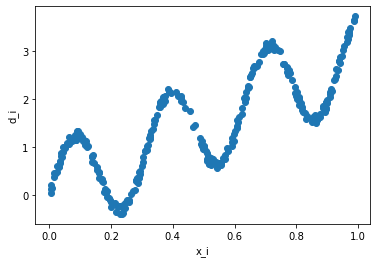

In [4]:
plt.scatter(x,d)
plt.xlabel("x_i")
plt.ylabel("d_i")
plt.show()

In [5]:
class Neural_Network():
    def __init__(self,lr):
        np.random.seed(42)
        self.w_h = np.random.randn(24)
        self.w_o = np.random.randn(24)
        self.b_h = np.random.randn(24)
        self.b_o = np.random.randn(1)
        self.lr = lr
        self.dwo,self.dwh,self.dbh,self.dbo = np.zeros(24),np.zeros(24),np.zeros(24),np.zeros(1)
    
    def forward(self,x):
        a = self.w_h * x + self.b_h
        h = np.tanh(self.w_h * x + self.b_h)
        o = np.sum(self.w_o * h) + self.b_o
        return o,h,a
    
    def backward(self,o,h,a,x,y):
        self.dwo += -1 * (o-y) * h
        self.dwh += -1 * (o-y) * self.w_o * (1 - (np.tanh(a))**2) * x
        self.dbo += -1 * (o-y)
        self.dbh += -1 * (o-y) * self.w_o * (1 - (np.tanh(a))**2)
    
    def zero_grad(self):
        self.dwo,self.dwh,self.dbh,self.dbo = np.zeros(24),np.zeros(24),np.zeros(24),np.zeros(1)
    
    def weight_updates(self):
        self.w_o = self.w_o + self.lr * (self.dwo)
        self.w_h = self.w_h + self.lr * (self.dwh)
        self.b_o = self.b_o + self.lr * (self.dbo)
        self.b_h = self.b_h + self.lr * (self.dbh)
    
    def update_lr(self):
        self.lr/=10

In [6]:
def square_loss(x,y):
    return 1/2 * ((x-y)**2)

def train_loop(model,data,target,loss_fn):
    o,h,a = model.forward(data)
    model.backward(o,h,a,data,target)
    loss = square_loss(o,target)[0]
    model.weight_updates()
    model.zero_grad()
    return loss

In [7]:
epochs = 10000
model = Neural_Network(lr=0.01)
for epoch in range(0,epochs):
    loss_per_epoch = 0
    for i in range(0,300):
        loss = train_loop(model,x[i],d[i],square_loss)
        loss_per_epoch += loss
    loss_per_epoch/=300
    if epoch!=0:
        if loss_previous_epoch == loss_per_epoch:
            model.update_lr()
    loss_previous_epoch = loss_per_epoch
    if loss_per_epoch==0:
        print("converged")
        print("Epochs:",epoch+1)
        break
loss_per_epoch

0.002583088101414392

In [8]:
model.lr

0.01

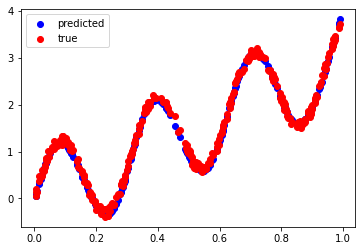

In [18]:
fig, ax = plt.subplots()
for i in x:
    o = model.forward(i)[0][0]
    blue = ax.scatter(i,o,color="blue")
red = ax.scatter(x,d,color="red")
blue.set_label("predicted")
red.set_label("true")
plt.legend()
plt.show()